In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random 
import scipy.stats as stats
import seaborn as sn
from scipy.stats import linregress

In [2]:
random.seed(42)

In [3]:
# Import clean data

file_path = "Output_data/spotify_clean.csv"

spotify_df = pd.read_csv(file_path, low_memory=False)

# Let the data speak to you 
                                        - Jeff , UTSA Bootcamp

In [4]:
# Look at data frame summary

spotify_df.head()

,year,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
0,1920,Mamie Smith,0.991000,0.598,0.224,0.000522,-12.628,12,0.0936,0.6340
1,1920,Screamin Jay Hawkins,0.643000,0.852,0.517,0.026400,-7.261,7,0.0534,0.9500
2,1920,Mamie Smith,0.993000,0.647,0.186,0.000018,-12.098,4,0.1740,0.6890
3,1920,Oscar Velazquez,0.000173,0.730,0.798,0.801000,-7.311,17,0.0425,0.0422
4,1920,Mixe,0.295000,0.704,0.707,0.000246,-6.036,2,0.0768,0.2990


## How has music chaged over time .. lets see..

In [5]:
# Create bins for decades

bins  = [1920,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2030]
bin_group = ['1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','2020 +']
# Sort df by bins

spotify_copy = spotify_df
spotify_copy['decade'] = pd.cut(spotify_copy['year'],bins,labels=bin_group,include_lowest=True)
spotify_copy = spotify_copy[['decade', 'artists', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'loudness', 'popularity', 'speechiness',
       'valence']]
song_count = spotify_copy.groupby('decade')['artists'].count()
song_count

decade
1920-1929     5631
1930-1939    10760
1940-1949    15491
1950-1959    20000
1960-1969    19610
1970-1979    20108
1980-1989    20074
1990-1999    20328
2000-2009    13779
2010-2019    22441
2020 +        6132
Name: artists, dtype: int64

In [6]:
# Generate a grouped dataframe to show average music characteristics

spotify_line = spotify_copy[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
song_line = spotify_line.groupby('decade').mean()

# Generate a line chart showing music characteristics change over decades
x_labels = ['1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s','2020+']
#x_axis = x_labels
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']
y_line = song_line[['acousticness','danceability','energy','instrumentalness','speechiness','valence']]


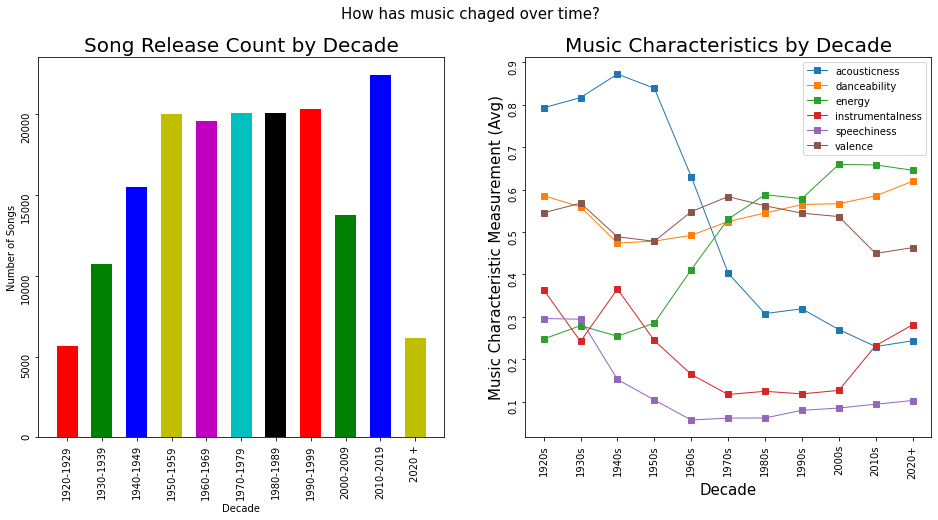

In [7]:
# Generate a bar plot showing total songs released by decade

x_axis = song_count.index
y_axis = song_count

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(16)

fig.suptitle('How has music chaged over time?', fontsize=15)

ax1.bar(x_axis, y_axis,width=.6,color=['r', 'g', 'b', 'y', 'm', 'c', 'k'] )
ax1.set_title('Song Release Count by Decade',fontsize=20)
ax1.set_ylabel('Number of Songs')
ax1.set_xlabel('Decade')
ax1.tick_params(labelrotation=90)

#Subplot 2

ax2.plot(x_labels, y_line, marker='s',linewidth=1)
ax2.set_title('Music Characteristics by Decade',fontsize=20)
ax2.set_ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
ax2.set_xlabel('Decade',fontsize=15)
ax2.legend(y_labels,loc ='upper right')
ax2.tick_params(labelrotation=90)
plt.show()

###  Question 1 : Does the decade impact release counts of songs

### Null Hypo - There is no statistically significant diffrence in number of releases over time
### Alter Hypo - There is statistically significant diffrence in number of releases over time

In [8]:
spotify_copy.head()

,decade,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
0,1920-1929,Mamie Smith,0.991000,0.598,0.224,0.000522,-12.628,12,0.0936,0.6340
1,1920-1929,Screamin Jay Hawkins,0.643000,0.852,0.517,0.026400,-7.261,7,0.0534,0.9500
2,1920-1929,Mamie Smith,0.993000,0.647,0.186,0.000018,-12.098,4,0.1740,0.6890
3,1920-1929,Oscar Velazquez,0.000173,0.730,0.798,0.801000,-7.311,17,0.0425,0.0422
4,1920-1929,Mixe,0.295000,0.704,0.707,0.000246,-6.036,2,0.0768,0.2990


In [9]:
song_count = pd.DataFrame(song_count[:-1])
song_count

,artists
decade,
1920-1929,5631
1930-1939,10760
1940-1949,15491
1950-1959,20000
1960-1969,19610
1970-1979,20108
1980-1989,20074
1990-1999,20328
2000-2009,13779


In [10]:
expected = int(song_count.sum()/song_count.count())


In [11]:
song_count['Expected'] = expected
song_count.columns= ["Releases" , 'Expected']
song_count

,Releases,Expected
decade,,
1920-1929,5631,16822
1930-1939,10760,16822
1940-1949,15491,16822
1950-1959,20000,16822
1960-1969,19610,16822
1970-1979,20108,16822
1980-1989,20074,16822
1990-1999,20328,16822
2000-2009,13779,16822


In [12]:
# The degree of freedom is 10-1 = 9
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 9)
critical_value

16.918977604620448

In [13]:
# Run the chi square test with stats.chisquare()
stats.chisquare(song_count['Releases'], song_count['Expected'])

Power_divergenceResult(statistic=15225.82689335394, pvalue=0.0)

### Since the chi-square value of 15225.82 at a confidence level of 95% exceeds the critical value of 16.91, we conclude that the differences seen no. of records relased per decade statistically significant

# How has Rolling Stones Music Style Evolved Over Time?


In [14]:
# Create data frame sorted by the artist, The Rolling Stones
spotify_stones = spotify_copy[spotify_copy['artists']=='The Rolling Stones']
spotify_stones.head()

,decade,artists,acousticness,danceability,energy,instrumentalness,loudness,popularity,speechiness,valence
8839,1960-1969,The Rolling Stones,0.0239,0.603,0.689,0.000003,-10.729,46,0.0304,0.7610
8868,1960-1969,The Rolling Stones,0.0383,0.723,0.863,0.031700,-7.890,77,0.0338,0.9310
8954,1960-1969,The Rolling Stones,0.1780,0.578,0.429,0.000060,-9.601,55,0.0268,0.0889
8964,1960-1969,The Rolling Stones,0.0289,0.579,0.877,0.571000,-8.830,54,0.0488,0.9000
8974,1960-1969,The Rolling Stones,0.2910,0.508,0.645,0.000003,-9.012,53,0.0395,0.4120


In [15]:
# Generate a grouped dataframe to show average music characteristics
stones_count = spotify_stones.groupby('decade')['artists'].count()
stones_values = stones_count.values[4:]
stones_index = stones_count.index[4:] 

x_axis = stones_index
y_axis = stones_values
# Generate a grouped dataframe to show average music characteristics

stones_line = spotify_stones[['decade','acousticness','danceability','energy','instrumentalness','speechiness','valence']]
stones_line = stones_line.groupby('decade').mean()
stones_line = stones_line.dropna()
x_values = stones_line.index
y_values = stones_line.values


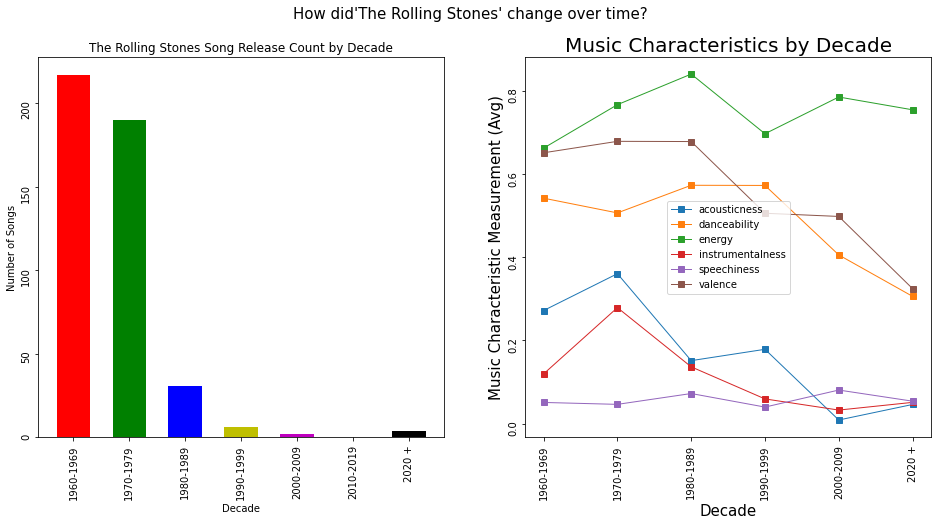

<Figure size 432x288 with 0 Axes>

In [16]:
# Plotting Number of Releases

fig, (ax3, ax4) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(16)

fig.suptitle("How did'The Rolling Stones' change over time?", fontsize=15)

ax3.bar(x_axis, y_axis,width=.6,color=['r', 'g', 'b', 'y', 'm', 'c', 'k'] )
ax3.set_title('The Rolling Stones Song Release Count by Decade')
ax3.set_ylabel('Number of Songs')
ax3.set_xlabel('Decade')
ax3.tick_params(labelrotation=90)

# Generate a line chart showing music characteristics change over decades
x_labels = ['1960s','1970s','1980s','1990s','2000s','2010s','2020+']
y_labels = ['acousticness','danceability','energy','instrumentalness','speechiness','valence']

ax4.plot(x_values, y_values, marker='s',linewidth=1)
ax4.set_title('Music Characteristics by Decade',fontsize=20)
ax4.set_ylabel('Music Characteristic Measurement (Avg)',fontsize=15)
ax4.set_xlabel('Decade',fontsize=15)
ax4.legend(y_labels,loc ='center')
ax4.tick_params(labelrotation=90)
plt.show()
plt.tight_layout()

### Question 2 : What is the correlation between the various music charecteristics of 'The Rolling stones'
### Hypo : From the data we state that there is no statistically significant relation between energy and instrumentalness 


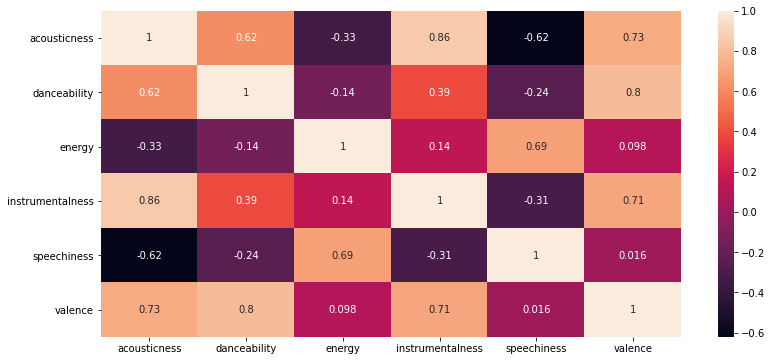

In [17]:
# create  a correlation matrix
cormatrix = stones_line.corr()
plt.figure(figsize=(13,6))
sn.heatmap(cormatrix, annot=True)
plt.show()

In [18]:
#Fetch speechiness values
Stones_speechiness = stones_line.speechiness
# Fetch energy values
Stones_energy = stones_line.energy
stones_line.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'speechiness', 'valence'],
      dtype='object')

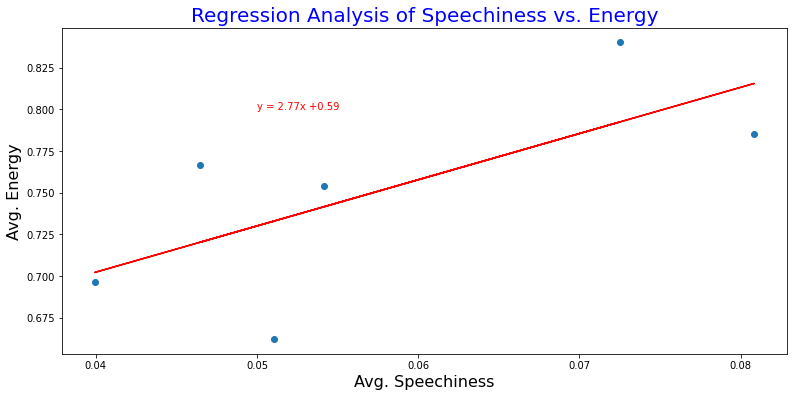

In [19]:
x_axis = Stones_speechiness
y_axis = Stones_energy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(13,6))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
plt.annotate(line_eq,xy=(0.05,0.8),color='red')
plt.title('Regression Analysis of Speechiness vs. Energy',fontsize=20 , color = 'b')
plt.xlabel('Avg. Speechiness',fontsize=16 )
plt.ylabel('Avg. Energy',fontsize=16 )
plt.show()


In [20]:
print(f"The r-value is: {round(rvalue**2,2)}")
print(f"The p-value is: {round(pvalue**2,2)}")

The r-value is: 0.48
The p-value is: 0.02


#### R value 0.65 shows that 65% of data is accounted for and there is a moderate correlation between the two.

### with P-value 0.00 we would reject our hypothesis that two characteristics are not correlated.

## Question 3 : Are energy and speechiness correlated?

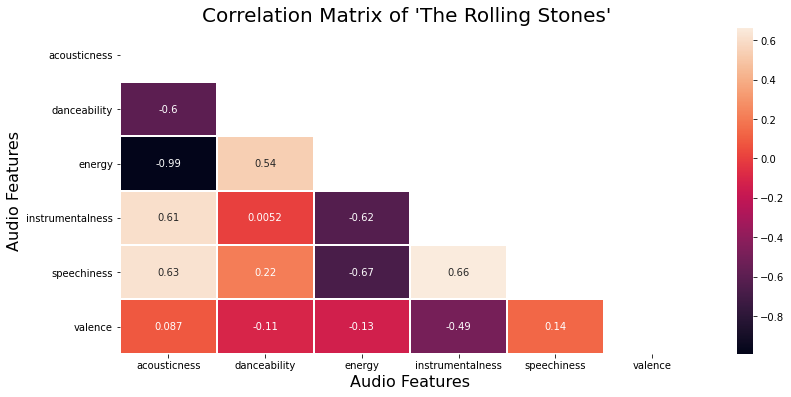

<Figure size 432x288 with 0 Axes>

In [25]:
matrix = np.triu(song_line.corr())
corrMatrix = song_line.corr()
plt.figure(figsize=(13,6))
sn.heatmap(corrMatrix, annot=True , mask=matrix ,linewidths=1 )
plt.title("Correlation Matrix of 'The Rolling Stones' ",fontsize=20 , color = 'k')
plt.xlabel('Audio Features',fontsize=16 )
plt.ylabel('Audio Features',fontsize=16 )

plt.show()
plt.tight_layout()

In [22]:
spotify_speechiness = song_line.speechiness
spotify_energy = song_line.energy


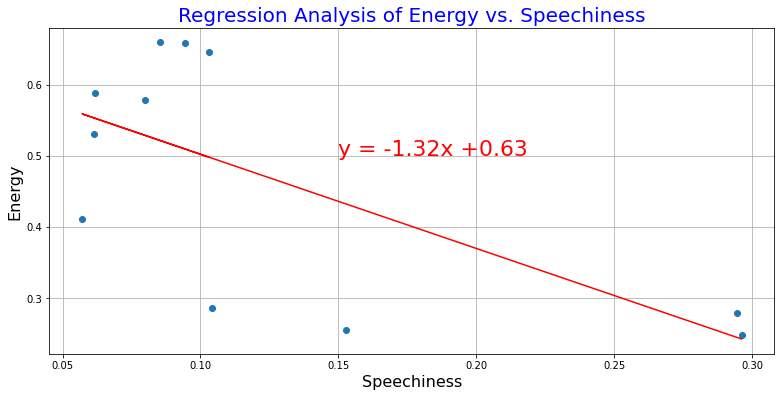

<Figure size 432x288 with 0 Axes>

In [23]:
x_axis = spotify_speechiness
y_axis = spotify_energy
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.figure(figsize=(13,6))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
plt.annotate(line_eq,xy=(0.15,0.5),color='red',fontsize=22)
plt.title('Regression Analysis of Energy vs. Speechiness',fontsize=20 , color = 'b')
plt.xlabel('Speechiness',fontsize = 16,color = 'k')
plt.ylabel('Energy',fontsize = 16,color = 'k')
plt.grid()
#Save as png file
plt.savefig("Images/EnergyVsSpeechiness")


plt.show()
plt.tight_layout()

In [24]:
print(f"The r-value is: {round(rvalue**2,2)}")
print(f"The p-value is: {round(pvalue**2,2)}")
rvalue

The r-value is: 0.45
The p-value is: 0.0


-0.6690808372409175

### p value 0 shows that there is a statistically significant relationship between the two features
### r value 0.45 shows that 45% of the data is acocunted for and there is a moderate relationship between the two variables.

### As Energy increases Speechiness decreases